**Data Visualization Chapter 13.**

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import random
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [ ]:
df = pd.read_csv('https://github.com/mwaskom/seaborn-data/raw/master/flights.csv')
month2int = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}
df['month'] = df['month'].map(month2int)
df['day'] = 1
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df['1y'] = df['passengers'].rolling(window=12).mean()

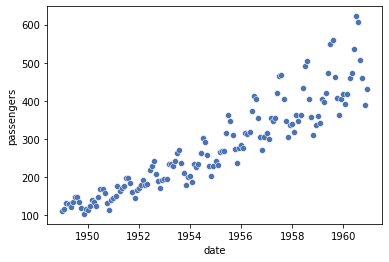

In [ ]:
sns.set_palette("deep")
sns.scatterplot(x='date',y='passengers',data=df)
plt.show()

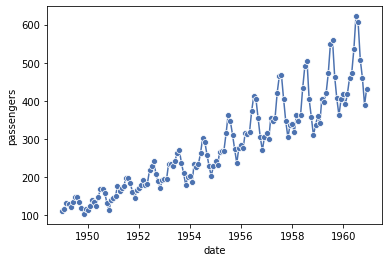

In [ ]:
sns.lineplot(x='date',y='passengers',data=df,marker='o')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


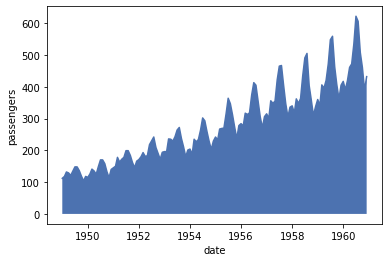

In [ ]:
x=df['date']
y=df['passengers']
sns.lineplot(x,y)
plt.fill_between(x,y)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


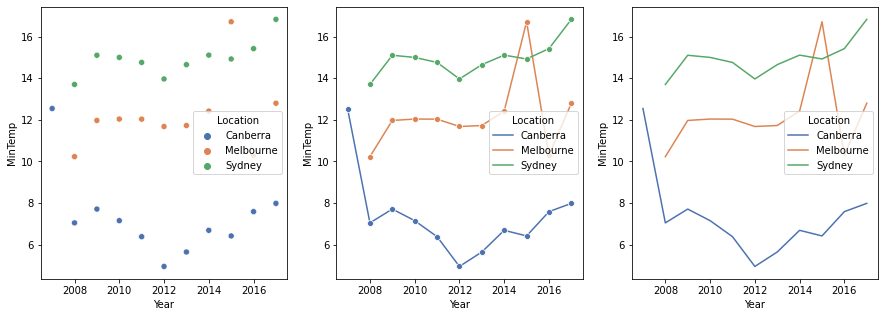

In [ ]:
from seaborn import palettes
weather_df = pd.read_csv('weatherAUS.csv', usecols=['Date', 'Location', 'MinTemp', 'MaxTemp'])
location = weather_df.query("Location == 'Sydney'|Location == 'Canberra'|Location == 'Melbourne'")
location['Date'] = location['Date'].astype('datetime64')
location['Year'] = location['Date'].dt.year
location = location.groupby(['Year','Location']).mean()
fig = plt.figure(figsize=(15,5))
for i in range(1,4):
  globals()['area{}'.format(i)]=fig.add_subplot(1,3,i)

a1 = sns.scatterplot(x='Year',y='MinTemp',hue='Location',data=location,ax=area1)
a2 = sns.lineplot(x='Year',y='MinTemp',hue='Location',data=location,marker='o',ax=area2)
a3 = sns.lineplot(x='Year',y='MinTemp',hue='Location',data=location,ax=area3)
plt.show()

In [ ]:
from google.colab import files
myfile = files.upload()

Saving oats.csv to oats.csv


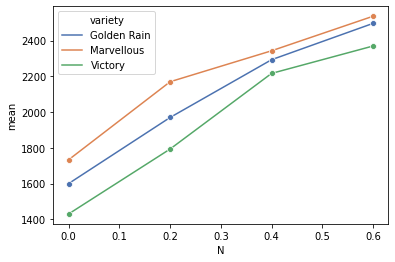

In [ ]:
oats = pd.read_csv('oats.csv')
sns.lineplot(x='N',y='mean',hue='variety',data=oats,marker='o')
plt.show()

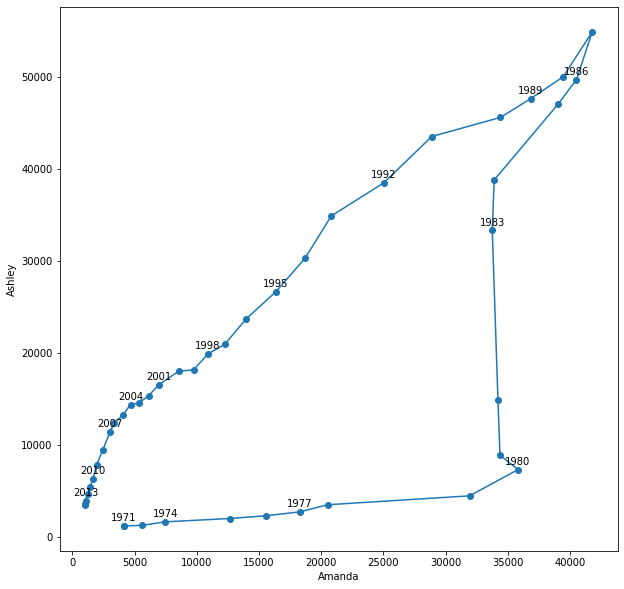

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/5_OneCatSevNumOrdered.csv")

# filter data
df = df.loc[(df.name=="Ashley") | (df.name=="Amanda")]
df = df.loc[(df.sex=="F") & (df.year>1970)]
df = pd.pivot_table(df, values='n', index=['year'], columns=['name'])

# set the figure size
plt.figure(figsize=(10, 10))

# plot the connected scatterplot
plt.plot(df.Amanda, df.Ashley, '-', marker='o')

# add annotations in every 3 data points with a loop
for line in range(0, df.shape[0], 3):
     plt.annotate(
          df.index[line], 
          (df.Amanda.iloc[line], df.Ashley.iloc[line]+300 ) ,
          va='bottom',
          ha='center'
     )

# x axis label
plt.xlabel('Amanda')

# y axis label
plt.ylabel('Ashley')

# show the graph
plt.show()

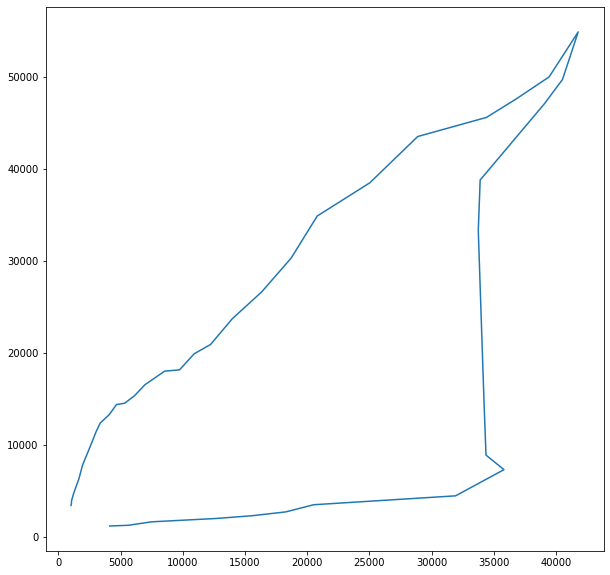

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(df.Amanda, df.Ashley, '-')
plt.show()

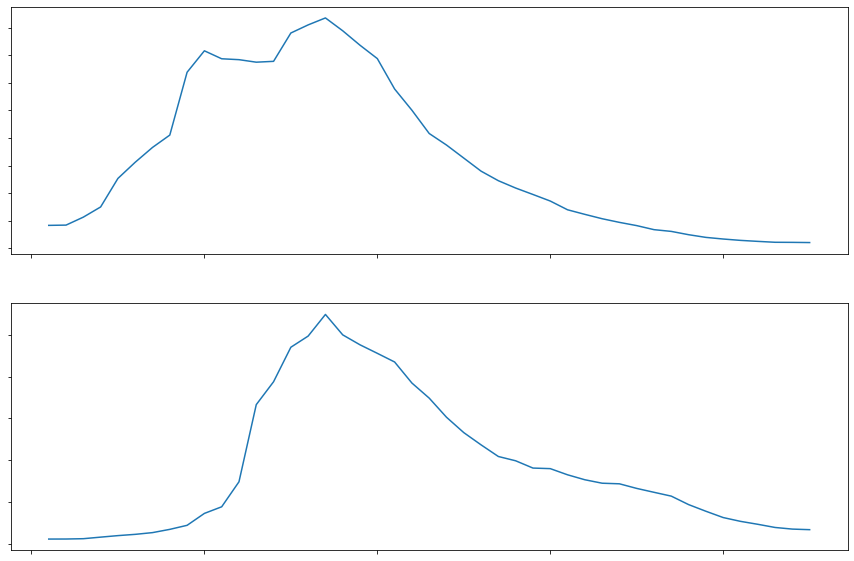

In [ ]:
fig = plt.figure(figsize=(15,10))
for i in range(1,3):
  globals()['area{}'.format(i)]=fig.add_subplot(2,1,i)

a1 = sns.lineplot(x='year',y='Amanda',data=df,ax=area1)
a1.set(xticklabels=[],yticklabels=[],xlabel=None,ylabel=None)
a2 = sns.lineplot(x='year',y='Ashley',data=df,ax=area2)
a2.set(xticklabels=[],yticklabels=[],xlabel=None,ylabel=None)
plt.show()

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#30차원을 3차원으로 줄이기(PCA)
X = df.values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca_3 = PCA(n_components= 3, random_state=2020)
pca_3.fit(X_scaled)
X_pca_3 = pca_3.transform(X_scaled)

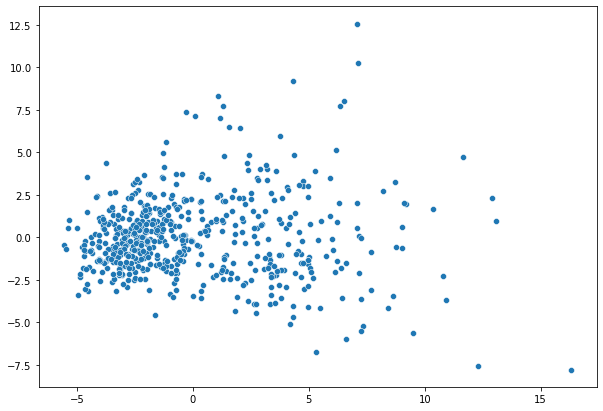

In [ ]:
plt.figure(figsize = (10,7))
sns.scatterplot(x=X_pca_3[:,0], y = X_pca_3[:,1])
plt.show()

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv')
df = df.groupby(["year",'month'], sort=False).mean()
df = df.reset_index()
df
df = df.drop(['year','month','day','hour','pm2.5'],axis=1)

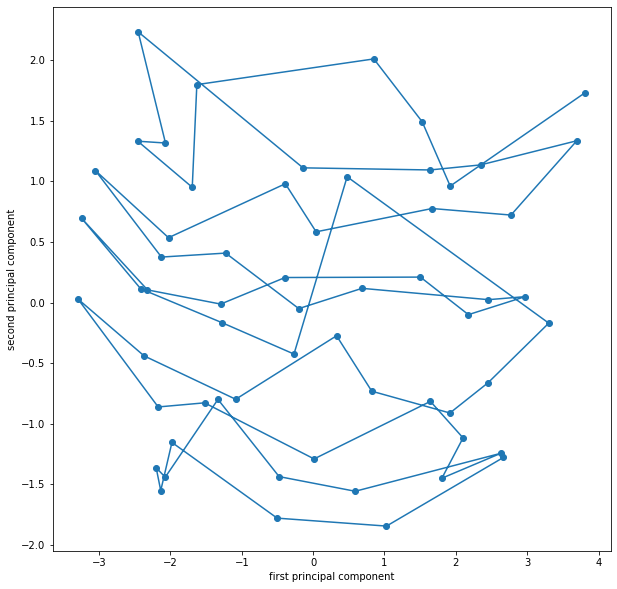

In [ ]:
#30차원을 3차원으로 줄이기(PCA)
X = df.values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
from sklearn.decomposition import PCA
pca_3 = PCA(n_components= 3, random_state=2020)
pca_3.fit(X_scaled)
X_pca_3 = pca_3.transform(X_scaled)
# set the figure size
plt.figure(figsize=(10, 10))

# plot the connected scatterplot
plt.plot(X_pca_3[:,0],X_pca_3[:,1], '-',marker='o')
# x axis label
plt.xlabel('first principal component')

# y axis label
plt.ylabel('second principal component')

# show the graph
plt.show()

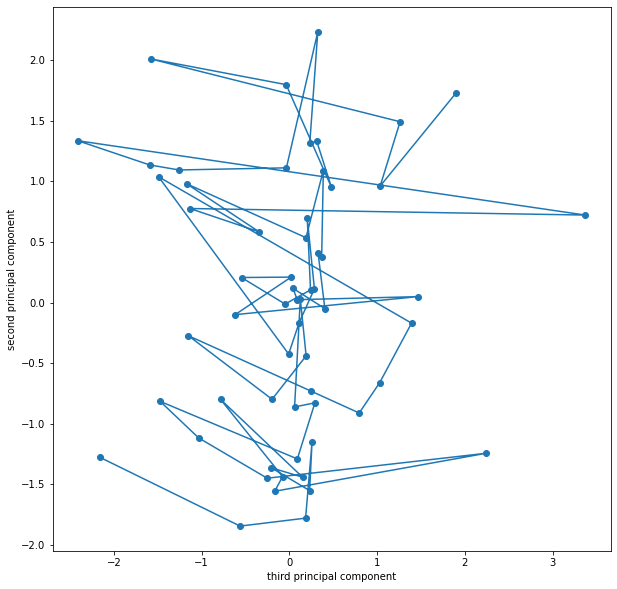

In [ ]:
# set the figure size
plt.figure(figsize=(10, 10))

# plot the connected scatterplot
plt.plot(X_pca_3[:,2],X_pca_3[:,1], '-',marker='o')
# x axis label
plt.xlabel('third principal component')

# y axis label
plt.ylabel('second principal component')

# show the graph
plt.show()